In [41]:
import numpy as np
from numpy import linalg as LA
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler

In [5]:
df = pd.read_csv("ex_pca_data1.csv", names=['feature_1', 'feature_2'])
df.head()

,feature_1,feature_2
0,2.816848,4.818958
1,3.888824,5.100366
2,3.343234,5.893013
3,5.879734,5.521417
4,3.103919,3.857102


Text(0, 0.5, 'feature 2')

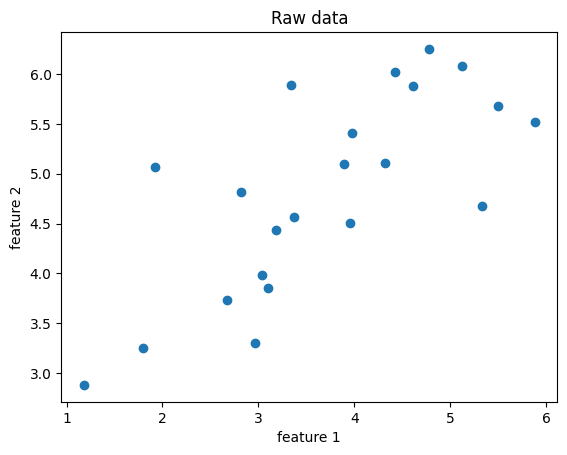

In [28]:
plt.scatter(df['feature_1'], df['feature_2'])
plt.title('Raw data')
plt.xlabel('feature 1')
plt.ylabel('feature 2')

In [38]:
X =  df[['feature_1', 'feature_2']].values
scaler = StandardScaler()
X = scaler.fit_transform(X)
mean, std = scaler.mean_, scaler.scale_

Text(0, 0.5, 'feature 2')

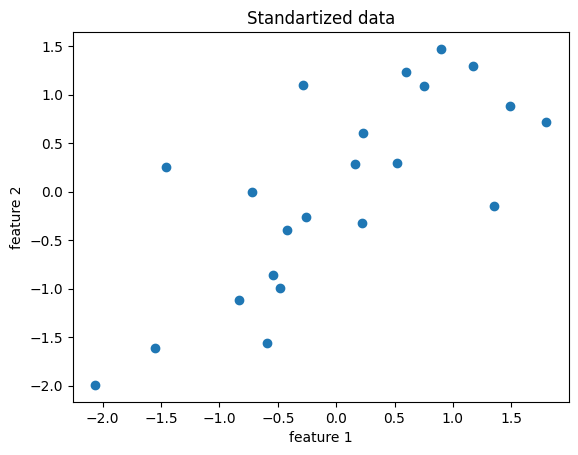

In [39]:
plt.scatter(X[:,0], X[:,1])
plt.title('Standartized data')
plt.xlabel('feature 1')
plt.ylabel('feature 2')

In [42]:
m = X.shape[0]
correlation_matrix = 1/m * X.T @ X
correlation_matrix

array([[1.        , 0.73017714],
       [0.73017714, 1.        ]])

In [60]:
lambds, C = LA.eig(correlation_matrix)

In [61]:
for i in range(len(lambds)):
    ci = C[:,i]
    lambd = lambds[i]
    print(f'Component {i} with vector {ci} has sample variance {lambd}')

Component 0 with vector [0.70710678 0.70710678] has sample variance 1.7301771369537051
Component 1 with vector [-0.70710678  0.70710678] has sample variance 0.26982286304629477


In [62]:
delt1 = lambds[0] / np.sum(lambds)
print(f'Relative proportion of variance retained when projected onto 1 component {delt1}')

Relative proportion of variance retained when projected onto 1 component 0.8650885684768526


In [69]:
C_reduce = np.copy(C[:, 0]).reshape(-1, 1)
C_reduce

array([[0.70710678],
       [0.70710678]])

In [93]:
Z = X @ C_reduce

In [75]:
X_recovered = Z @ C_reduce.T
print(f'For 1st element x = {X[0]}, x recovered = {X_recovered[0]}')

For 1st element x = [-7.17232221e-01 -5.87586651e-04], x recovered = [-0.3589099 -0.3589099]


Text(0, 0.5, 'feature 2')

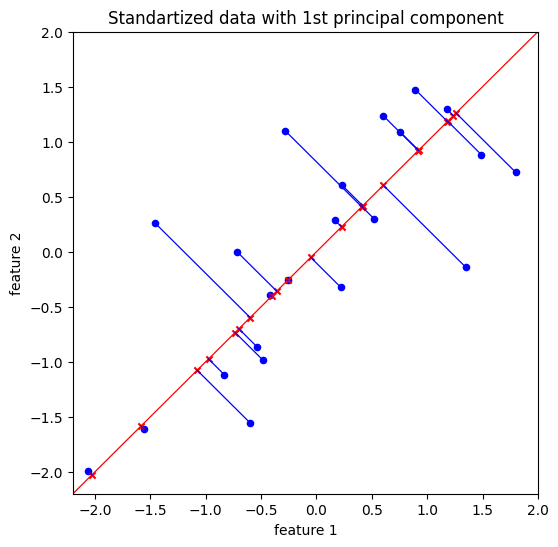

In [99]:
plt.figure(figsize=(6, 6))
plt.scatter(X[:,0], X[:,1], color='blue', s=20)
plt.scatter(X_recovered[:,0], X_recovered[:,1], marker='x', c='red', s=20)
plt.plot(C[0, 0] * np.arange(-4, 4, 0.1), C[1, 0] * np.arange(-4, 4, 0.1), color='red', linewidth=0.9)
for i in range(m):
    plt.plot([X[i, 0], X_recovered[i, 0]], 
             [X[i, 1], X_recovered[i, 1]], color='blue', linewidth=0.9)
plt.title('Standartized data with 1st principal component')
plt.xlim(-2.2, 2.0)
plt.ylim(-2.2, 2.0)
plt.xlabel('feature 1')
plt.ylabel('feature 2')